### 머신러닝?
- 데이터를 기반으로 학습해서 규칙/패턴을 찾아 미지의 데이터를 예측/판단하는 기술
- 인공지능 > 머신러닝 > 딥러닝 > 생성형 AI

### 머신러닝 종류
> 1. 지도학습 : 라벨(정답)이 있는 상태에서 학습하는 방법
> - 분류 : 라벨이 이산적인 값일 때 (ex. 혈액형, 흑 or 백, 강아지 or 고양이 등)
> - 회귀 : 라벨이 연속적인 값일 때 (ex. 주식, 매출액, BMI 지수 등)

> 2. 비지도학습 : 라벨(정답)이 없는 상태에서 학습하는 방법
> - 군집화(클러스터링) : 유사한(또는 비슷한) 데이터끼리 묶어서, 특정 영역을 구분짓는 방법

> 3. 강화학습 : 완전한 답이 아닌, 보상을 더 얻기 위해 판단력(정책)을 강화하는 방법

### 머신러닝 모델링 단계
> 1. 문제정의
>    - 비지니스 목적 정의, 데이터 확보 방안

> 2. 데이터 수집
>    - 오픈소스 데이터(공공데이터, AIHub, Kaggle, HuggingFace, CoCo 등), 크롤링(스크래핑), DataBase, 센서 등

> 3. 데이터 전처리
>    - 결측치 제거/대체(모델 학습 불가), 이상치 제거/대체, 변수처리(특성 공학_컬럼을 /삭제/선택, 스케일링, 인코딩, 바이닝 등)

> 4. EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

> 5. 검증(모델 선택, 하이퍼 파라미터 튜닝)

> 6. 학습

> 7. 평가

#### 1. 문제정의
---
> **시나리오** 🌏 (서비스기획자)

```
- A업체는 가정 내 온습도를 측정하는 기존 제품을 통해 고객에게 서비스를 제공해 왔음
- 한때 업계 선두를 유지했으나, 다양한 경쟁사의 등장으로 인해 최근 판매량이 감소하고 있는 상황임
- 단순히 제품 판매에 의존하는 비즈니스 모델로는 지속적인 성장이 어렵다고 판단하여, 새로운 고객 가치를 창출할 수 있는 제품 개발을 추진하게 됨
- 온습도 센서로부터 수집한 데이터를 기반으로 AI 제습기를 개발하여, 고객의 편의성을 높이고 경쟁사 대비 우위를 선점하려고 함
```

#### 2. 데이터 수집
- 다양한 방법으로 데이터 수집 가능
- crawling, API, 파일, DB 등

In [1]:
# 필요한 라이브러리 import
# numpy
import numpy as np
# pandas
import pandas as pd

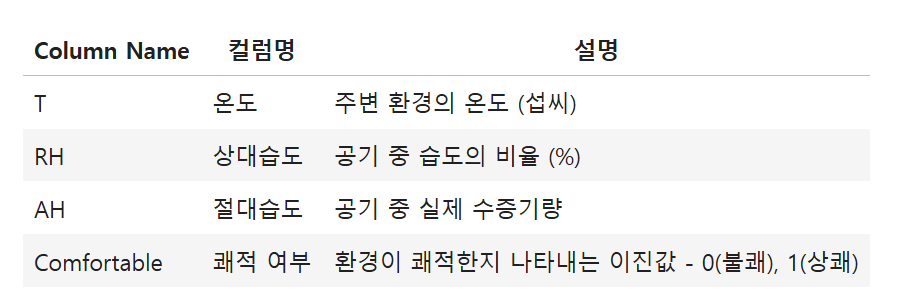

In [2]:
# 온습도관측데이터.csv 불러와서 data에 저장
data = pd.read_csv("./data/온습도 관측 데이터.csv", encoding = 'utf8')
data

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0
...,...,...,...,...
1541,19.250,46.625000,1.029781,0
1542,2.025,64.949998,0.466071,0
1543,35.325,28.475000,1.603368,0
1544,24.450,42.525000,1.285450,0


In [3]:
# 데이터 확인
# 모양
print(data.shape)
# 정보
print(data.info()) # 결측치가 존재하지 않음
# 데이터 샘플링(앞에서부터 5개 뽑아오기, 뒤에서부터 3개 뽑아오기)
print(data.head(5))
print(data.tail(3))
# 데이터 기술통계
print(data.describe())

(1546, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            1546 non-null   float64
 1   RH           1546 non-null   float64
 2   AH           1546 non-null   float64
 3   Comfortable  1546 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.4 KB
None
        T         RH        AH  Comfortable
0  21.025  30.625000  0.753814            0
1   9.250  37.550000  0.439072            1
2  35.825  28.724999  1.662621            0
3  15.975  35.824999  0.645597            1
4  12.200  69.575001  0.985989            0
           T         RH        AH  Comfortable
1543  35.325  28.475000  1.603368            0
1544  24.450  42.525000  1.285450            0
1545  21.075  63.975001  1.579487            0
                 T           RH           AH  Comfortable
count  1546.000000  1546.000000  1546.000000  1546.000000
mean    

#### 3. 데이터 전처리
- 결측치 제거 및 대체
- 이상치 제거 및 대체
- 변수 처리(특성 추가, 삭제, 선택, 스케일링, 인코딩 등)
  - 스케일링(scaling) : 단위를 일치시켜줌으로 가중치를 일정하게 설정
  - 인코딩(encoding) : 범주형 → 수치형, 컴퓨터는 텍스트 형태의 자료를 이해할 수 없기 때문에 숫자로 변환
    ex) 상쾌 : 1, 불쾌 : 0

#### 4. EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
- 데이터의 기술통계치(요약 수치), 시각화를 통한 다양한 각도에서 데이터를 관찰하고 이해하는 과정
- 데이터 전처리를 위한 근거가 되기도 함

In [4]:
# 데이터 시각화 진행
# matplotlib -> pyplot, plt
import matplotlib.pyplot as plt
# seaborn -> sns
import seaborn as sns

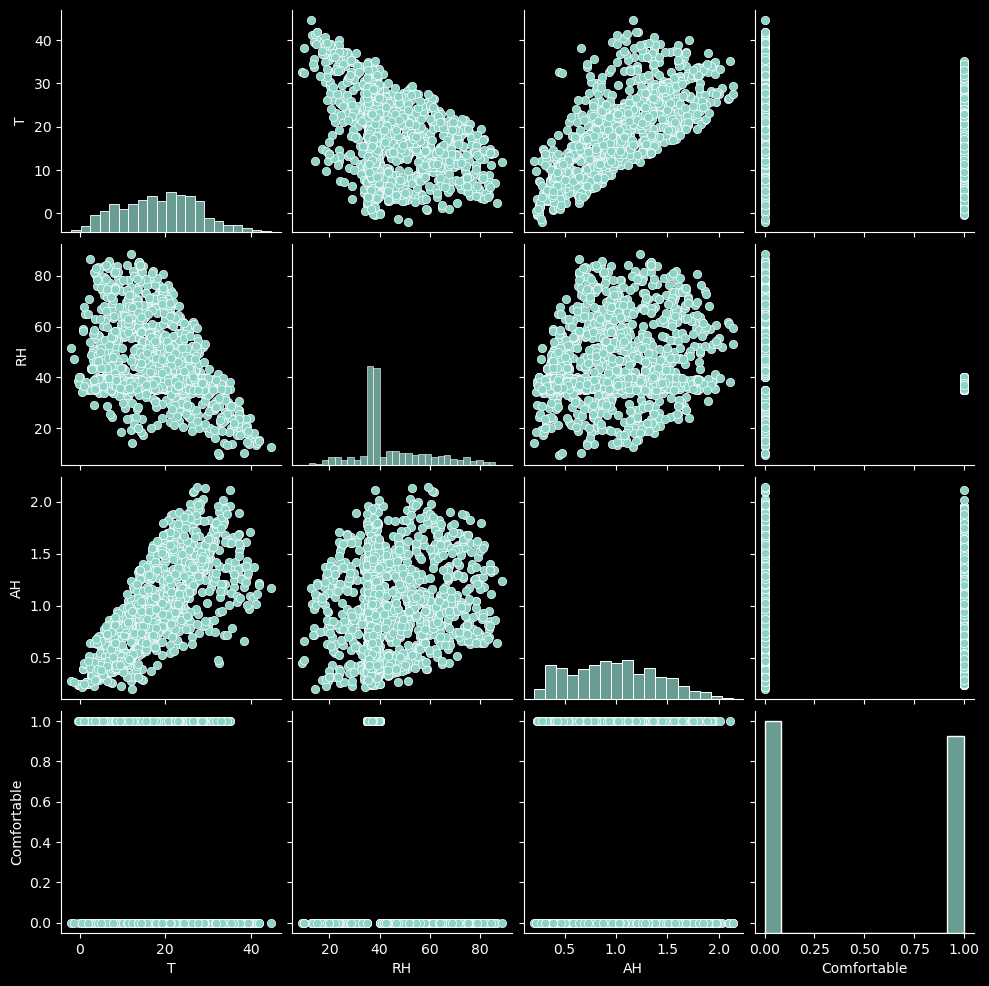

In [5]:
# 모든 변수 조합에 대한 scatter plot(산점도)

# 배경화면을 검정색으로 설정해서 시각적으로 강한 대비를 제공
plt.style.use(['dark_background'])
sns.pairplot(data)
plt.show()

# 산점도를 통해서 변수 간의 관계성을 어느정도 파악 가능.
# 두 변수간의 선형관계를 수치적으로 표현할 수 있음 → 상관계수.

### 📊 공분산(Covariance)과 상관계수(Correlation Coefficient)

---

#### ✅ 1. 공분산(Covariance)

- **두 변수의 변화 방향**을 나타내는 지표
- **양의 공분산**: 두 변수가 같은 방향(↑↑ 또는 ↓↓)으로 움직임  
- **음의 공분산**: 두 변수가 반대 방향(↑↓ 또는 ↓↑)으로 움직임

#### 📘 수식
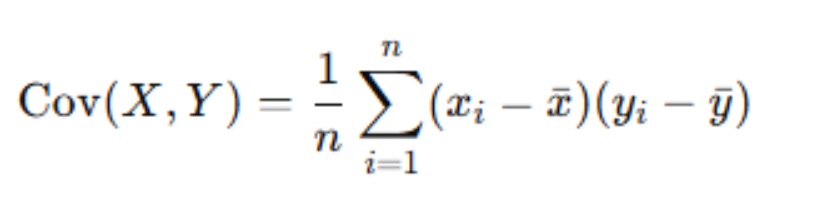

#### ⚠️ 특징
- 값의 범위 제한 없음 (–∞ ~ +∞)
- 단위(스케일)에 영향을 받음
- 해석이 어렵고 비교가 불편함

### ✅ 2. 상관계수(Correlation Coefficient)

- **공분산을 정규화한 값**
- 두 변수 간 **선형 관계의 강도와 방향**을 나타냄

#### 📘 수식 (피어슨 상관계수)
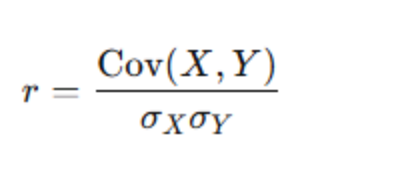

#### ✅ 값의 범위
- \( +1 \): 완전한 양의 선형 관계  
- \( 0 \): 선형 관계 없음  
- \( -1 \): 완전한 음의 선형 관계

#### ✅ 특징
- 단위에 무관함 (비교 용이)
- 해석이 직관적

In [6]:
# 상관계수
# : 비례하거나 반비례하는 정도를 숫자로 표현한 값(-1 ~ +1)
# : 공분산을 -1 ~ +1 범위로 정규화한 값
data.corr()

,T,RH,AH,Comfortable
T,1.000000,-0.414828,0.776049,0.080162
RH,-0.414828,1.000000,0.182484,-0.431584
AH,0.776049,0.182484,1.000000,-0.113466
Comfortable,0.080162,-0.431584,-0.113466,1.000000


### 상관계수 해석
- 온도(T) - 절대습도(AH) 강한 양의 상관관계 → 온도가 오르면 공기 중의 수증기 양이 증가하는 건 자연스러운 현상
- 상대습도(RH) - 쾌적도(comfortable) 음의 상관관계 → 상대 습도가 높으면(끈적끈적) 사람들이 덜 쾌적하게 느낌
- 절대습도(AH) - 쾌적도(comfortable) 거의 무관(0에 가까운 값) → 절대적인 수증기량보다는 "상대적인" 습도감이 사람의 쾌적도에 영향을 미침
- 온도(T) - 쾌적도(comfortable) 거의 상관없음 → 온도 하나만으로는 쾌적함을 설명하기 어려움, 습도와 온도를 복합적으로 고려

### 정답 데이터, 문제 데이터 분리

In [7]:
# 쾌적도(정답, y, label(예측값), 종속변수)
y = data['Comfortable'] # Comfortable 열 저장
# 상대습도, 절대습도, 온도(문제, X, attributes, 독립변수)
X = data[['T', 'RH', 'AH']] # T RH AH 열 저장

### 학습(train) 데이터, 테스트(test) 데이터

In [8]:
# 전체 데이터(X, y)를 test(3) : train(7)로 분리
# 모델의 일반화 성능을 확보하기 위함

print(len(X) * 0.7) # 전체 데이터의 70% : 1082개

# 1. X 데이터 분리
# X_train : 처음부터 1082개 데이터 슬라이싱
# X_test : X_train을 제외한 나머지
X_train = X.head(1082)
X_test = X.tail(len(X) - 1082)

# 2. y 데이터 분리
# y_train : 처음부터 1082개 데이터 슬라이싱
# y_test : y_train을 제외한 나머지
y_train = y.head(1082)
y_test = y.tail(len(y) - 1082)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 데이터의 앞쪽에 0이 몰려있다면
# 모델이 대부분 정답이 0인 데이터만 학습
# 정답이 1인 데이터는 잘 못 맞출 확률이 올라감. → 클래스의 불균형, 데이터의 편향성

1082.1999999999998
(1082, 3) (464, 3) (1082,) (464,)


#### sklearn
- 대표적인 머신러닝 라이브러리
- 머신러닝 모델을 비롯해 전처리 도구 등을 지원
- https://scikit-learn.org/stable/getting_started.html

In [9]:
# 데이터 분할 도구 사용
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024, stratify = y)

# train_test_split(
#     *arrays, 분리할 데이터의 원본
#     test_size=None, 테스트 데이터의 개수(정수)/비율(실수)
#     train_size=None, 학습 데이터의 개수(정수)/비율(실수)
#     random_state=None, 재현성 → 무작위로 데이터를 섞은 후 분리 → 계속 데이터가 바뀌면 학습 결과를 재현하기 힘듦
# 한 번 섞고 뽑은 결과를 고정.
#     stratify=None, 클래스 불균형 해결(범주형 데이터일 때 사용)
# )

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1082, 3) (464, 3) (1082,) (464,)


In [12]:
# test_size = 0.25
# random_state = 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1159, 3) (387, 3) (1159,) (387,)


#### 5. 검증(모델 선택, 하이퍼 파라미터 튜닝)

In [13]:
# 생략

#### 6. 학습
- fit(학습용 문제데이터, 학습용 정답데이터)

- 라벨(정답)에서의 클래스 : 카테고리 요소(ex. 상쾌 or 불쾌)
- 일반적인 클래스 : 객체를 만들기 위한 설계도

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 1. 모델 생성(초기화)
knn = KNeighborsClassifier()

In [15]:
# 2. 학습
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# 예측해보기
knn.predict(X_test)[10], y_test.iloc[10]

(np.int64(0), np.int64(0))

#### 7. 평가

In [17]:
# 모델에 내장되어있는 평가 함수 : score(문제데이터, 정답데이터)
knn.score(X_test, y_test)
# 분류/회귀에 따라 모델에 내장되어 있는 score()가 다름.
# 분류 모델의 경우, 정확도(accuracy).
# 정확도 : 0~1, 전체 데이터 중에 맞춘 비율

0.979328165374677

In [18]:
# 매트릭스 패키지 활용
# 매트릭스 패키지에서 제공하는 평가지표 함수는 (??, ??)
from sklearn.metrics import accuracy_score

# 1. 예측값
y_pred = knn.predict(X_test)

# 2. 매트릭스 패키지 - accuracy_score 활용
accuracy_score(y_test, y_pred) # 실제값, 예측값

0.979328165374677

### 실습. 하이퍼 파라미터 튜닝해서 성능을 확인해보자.

In [19]:
# 모젤 초기화 단계에서 하이퍼 파라미터 튜닝 가능.
knn_hp = KNeighborsClassifier(n_neighbors = 3)

# 학습
knn_hp.fit(X_train, y_train)

# 예측
print(knn_hp.predict(X_test)[10], y_test.iloc[10])

# 평가
print(accuracy_score(y_test, knn_hp.predict(X_test)))

0 0
0.9819121447028424


### 다른 모델도 사용해보자.
- 머신러닝 현상(일반화, 과대적합, 과소적합)에 대해서도 이해해보자.

### 일반화, 과대적합, 과소적합
- 과대적합(overfitting) : 모신러닝 모델이 학습할 때 학습 데이터 셋에 지나치게 최적화가 되는 현상
  - 새로운 데이터를 맞추지 못할 가능성이 증가
- 과소적합(underfitting) : 머신러닝 모델이 학습을 제대로 하지 못한 것
  - 훈련, 테스트 모두에서 성능이 안나옴
- 일반화(generaliztion) : 학습데이터로 학습한 머신러닝 모델이 테스트 데이터에서도 훌륭한 성능을 나타내는 경우
  - 우리 모델의 최종 목표.
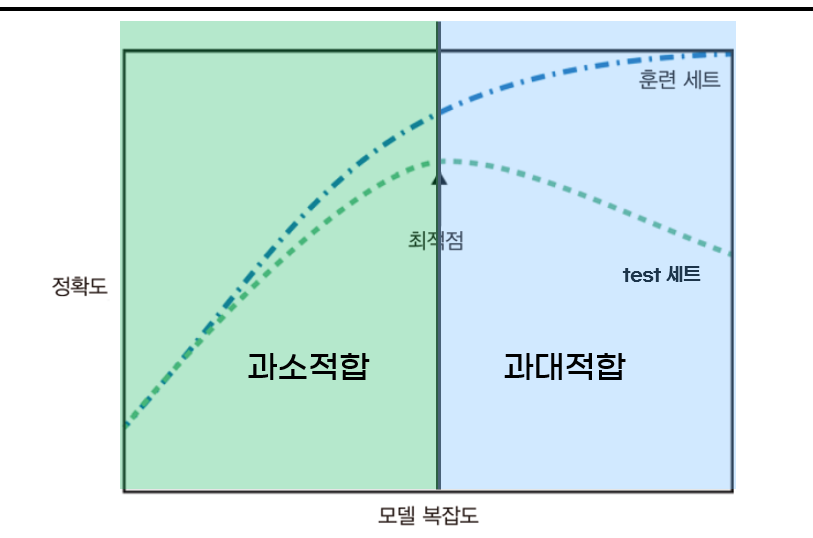

In [20]:
# DT(Decision Tree, 의사결정나무) : 스무고개 하듯이 질문(조건)을 통해서 데이터를 분류하는 모델
# 불순도(impurity)가 낮아지는 방향으로 질문 설정

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# 모델 객체 생성
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
tree.score(X_test, y_test), tree.score(X_train, y_train)
# 새로운 데이터를 잘 예측하는지, 학습이 제대로 되었는지

(1.0, 1.0)

In [24]:
!pip install graphviz

액세스가 거부되었습니다.


In [25]:
X.columns

Index(['T', 'RH', 'AH'], dtype='object')

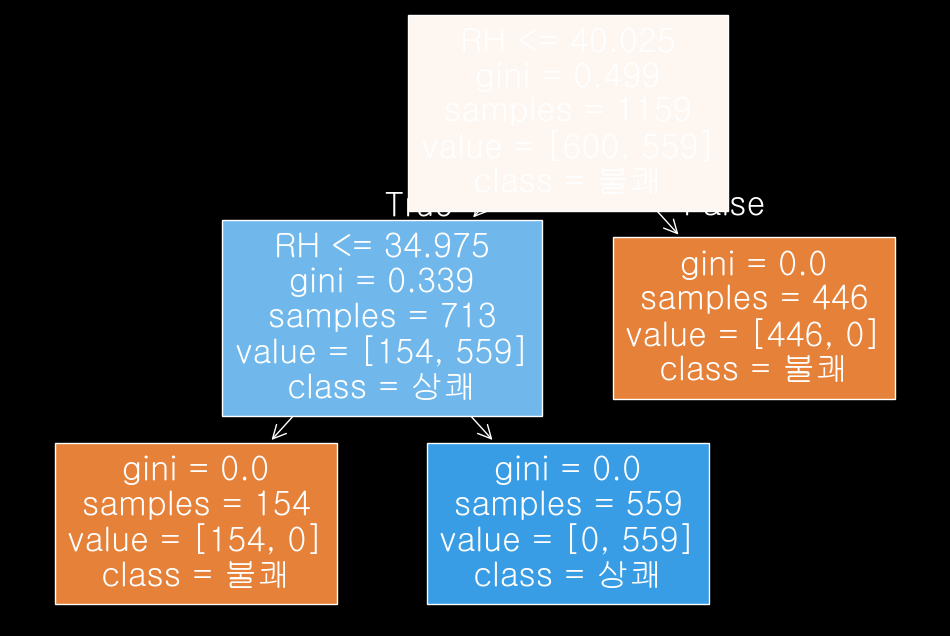

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize = (12, 8))
plt.rcParams['font.family'] = 'Gulim' # 한글 표기를 위해 폰트 설정
plot_tree(tree,
		feature_names = X.columns, # X[1] -> 특성 이름으로 표기
		class_names = ['불쾌', '상쾌'],
		filled = True # 노드 안에 있는 데이터의 비율에 따라 색상이 바뀜
		)

plt.show()

# 트리 구조를 확인해본 결과 'RH(상대습도)' 특성이 분류 기준으로 가장 중요한 역할을 하고 있음
# 첫 질문만 했는데 불쾌 클래스를 대부분 분리할 수 있을 정도
# 이는 데이터 셋에서 RH 특성과 타겟 값(comfortable) 사이의 관계가 매우 강하다는 것을 의미
# 결과적으로 모델이 RH 하나의 특성만으로도 높은 정확도를 달성할 가능성이 높음

### 만약 상대습도가 없었다면
- 중요한 특성인 RH를 탈락 시킨 후 모델링을 진행해보자.

In [27]:
# 1. RH 컬럼 삭제
# 방법 1) drop 시키기 방법2) RH 제외한 나머지 특성 인덱싱
X_train = X_train.drop(columns = 'RH')
X_test = X_test[['T', 'AH']]

In [28]:
# 2. 모델 생성 및 학습
# 2-1. 모델 객체 생성
tree = DecisionTreeClassifier()

# 2-2. 모델 학습
tree.fit(X_train, y_train)

# 2-3. test 데이터 예측
tree.predict(X_test)

# 2-4. 점수 확인
tree.score(X_test, y_test), tree.score(X_train, y_train)

(0.9276485788113695, 1.0)

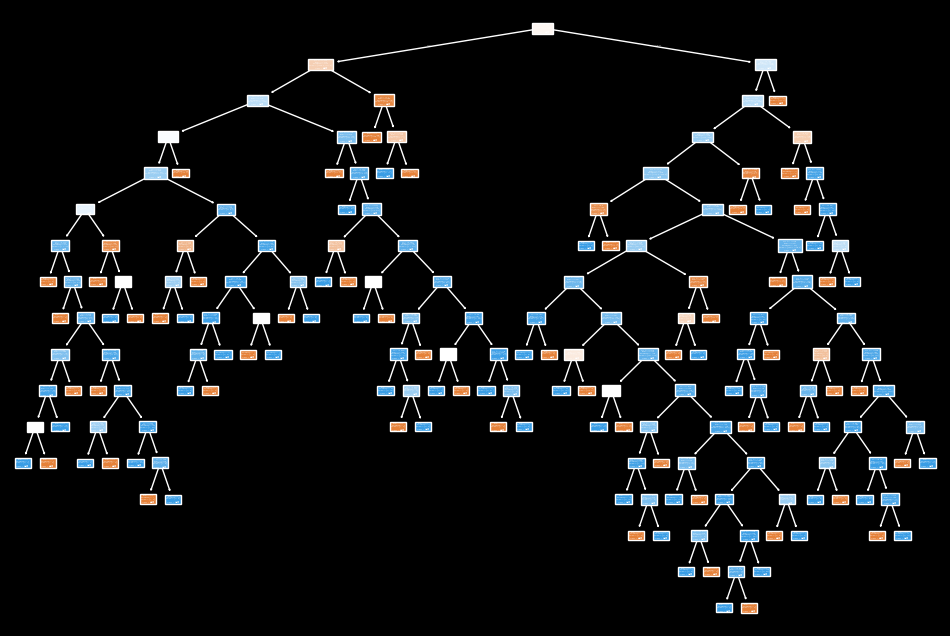

In [29]:
# 3. 트리 시각화 해보기
plt.figure(figsize = (12, 8))
plot_tree(tree,
		  feature_names = X.columns,
		  class_names = ['불쾌', '상쾌'],
          filled = True
		)

plt.show()
# 가지치기를 통해 모델의 과대적합을 해결해보자.

In [30]:
# 하이퍼파라미터 : 모델의 성능을 조정할 수 있는 것 중에서 사람이 설정할 수 있는 값
# knn는 k값 : 몇명의 이웃을 확일할 것인가
DecisionTreeClassifier() # 기본값으로 설정이 된 모델이 사용

DecisionTreeClassifier()

In [31]:
tree = DecisionTreeClassifier(
    max_depth = 7, # 트리의 최대 깊이, 깊이가 깊을수록 모델이 복잡해짐(조건이 세세하게 걸려있음), 일반화 성능이 떨어짐
    min_samples_split = 10, # 노드를 나눌 때 필요한 최소 샘플 수, 값이 클수록 트리가 덜 복잡해지고 과적합을 줄일 수 있음
    min_samples_leaf = 20, # 리프 노드가 가져야하는 최소 샘플 수, 값이 클수록 리프노드가 커지고 트리의 복잡성이 감소
    max_leaf_nodes = 24 # 트리가 가질 수 있는 리프 노드의 최대 개수, 트리의 복잡성을 제어하고, 과적합 방지
)

In [32]:
tree.fit(X_train, y_train)

print(tree.score(X_test, y_test), tree.score(X_train, y_train))

0.8449612403100775 0.8869715271786023


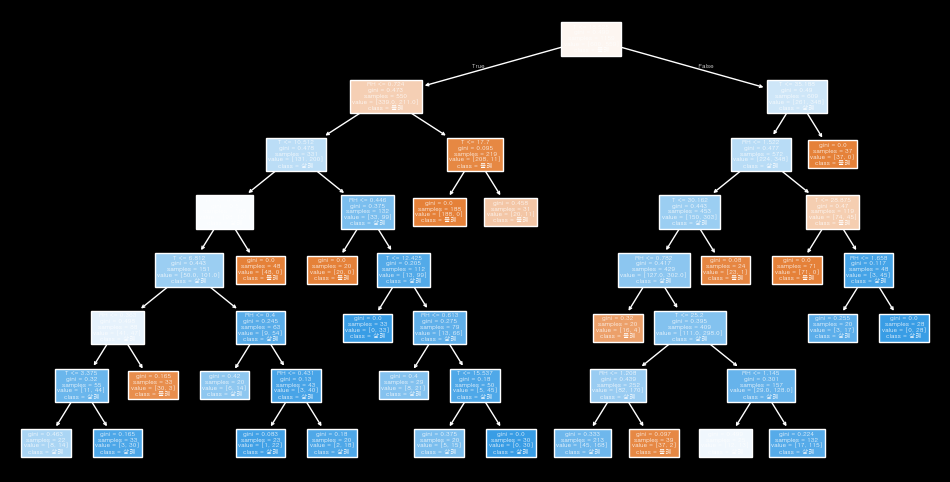

In [33]:
# 트리 모델이 단순해졌는지 시각화를 통해 확인
plt.figure(figsize = (12, 6))

plot_tree(tree,
		  feature_names = X.columns,
		  class_names = ['불쾌', '상쾌'],
          filled = True)

plt.show()
# 하이퍼 파라미터 튜닝을 하지 않은 모델에 비해
# 엄청나게 tree가 단순해졌음

In [34]:
tree = DecisionTreeClassifier(
    max_depth = 32, # 트리의 최대 깊이, 깊이가 깊을수록 모델이 복잡해짐(조건이 세세하게 걸려있음), 일반화 성능이 떨어짐
    min_samples_split = 2, # 노드를 나눌 때 필요한 최소 샘플 수, 값이 클수록 트리가 덜 복잡해지고 과적합을 줄일 수 있음
    min_samples_leaf = 1, # 리프 노드가 가져야하는 최소 샘플 수, 값이 클수록 리프노드가 커지고 트리의 복잡성이 감소
    max_leaf_nodes = 128 # 트리가 가질 수 있는 리프 노드의 최대 개수, 트리의 복잡성을 제어하고, 과적합 방지
)
tree.fit(X_train, y_train)

print(tree.score(X_test, y_test), tree.score(X_train, y_train))

0.9224806201550387 1.0


### 분류 모델 평가 지표
- 혼동 행렬(confusion matrix)를 기반으로 산출
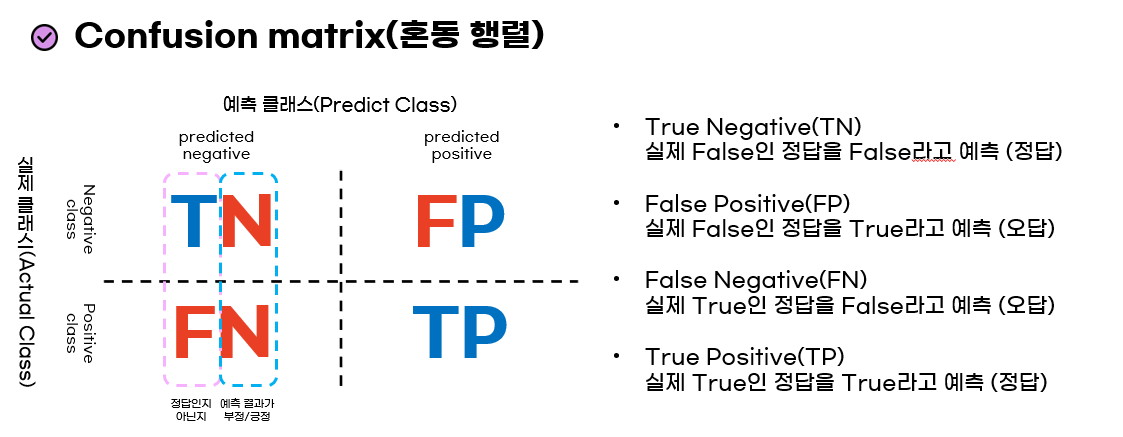
- 정확도(accuracy) : 전체 데이터 중에 맞춘 데이터의 비율, 클래스의 불균형이 심할 때
- 정밀도(Precision) : 양성이라고 예측한 것 중에 정답 데이터의 비율, 스팸 필터, 암 진단 같은 상황(실제 양성인 것을 음성으로 예측하지 않아야할 때)에서 자주 사용
- 재현율(recall) : 실제 양성인 것 중에 정답 베이터의 비율
- F1-score : 정밀도와 재현율 사이의 균형을 보고 싶을 때 사용, 값이 1에 가까울수록 좋은 모델
- ROC 곡선 : TPR(재현율) - FPR(위양성률) 곡선 -> 왼쪽 상단에 붙을수록 좋은 모델
- AUC(Area Under Curve) : ROC 곡선 아래 면적 -> 1에 가까울수록 좋은 모델

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
# 예측값 구해보기
y_pred = tree.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1]


In [37]:
confusion_matrix(y_test, y_pred)

array([[179,  21],
       [  9, 178]])

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [40]:
print("정확도 :", accuracy_score(y_test, y_pred))
print("정밀도 :", precision_score(y_test, y_pred))
print("재현율 :", recall_score(y_test, y_pred))
print(tree.score(X_test, y_test)) # 정확도를 산출, 상황에 따라서 중요한 수치를 구해서 사용해야함

정확도 : 0.9224806201550387
정밀도 : 0.8944723618090452
재현율 : 0.9518716577540107
0.9224806201550387


In [42]:
print("f1 score :", f1_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))

f1 score : 0.9222797927461139
roc_auc_score 0.9234358288770054
